# ITMAL Exercise


REVISIONS|
---------|------------------------------------------------
2018-1219| CEF, initial.                  
2018-0207| CEF, updated.           
2018-0207| CEF, rewritten accuracy paradox section.           

## Performance Metrics

There are a number of frequently uses metrics in ML, namely accuracy, precision, recall and the $F_1$ score. All are called _metrics_ (though they are not true norms, like ${\cal L}_2$ or ${\cal L}_1$ we saw last time).

Maybe performance _score_ would be a better name than performance metric, at least for the accuracy, precision, recall we will be looking at---emphasising the conceptual distinction between the  _score-function_ and _cost(/loss/error/objective)-function_ (the later is typically a true distance/norm function).  


You can find a lot of details on say precision and recall in Wikipedia

>  https://en.wikipedia.org/wiki/Precision_and_recall


### Nomenclature

NAME           |   SYMBOL   | ALIAS
---------------| --------------------
true positives | $TP$ |
true negatives | $TN$ | 
false positives| $FP$ | type I error 
false negatives| $FN$ | type II error 

and $N = N_P + N_N$ being the total number of samples and the number of positive and negative samples
respectively.

### Precision

$$
\def\ba{\begin{array}{lll}}
\def\ea{\end{array}}
\newcommand{\rem}[1]{}
\newcommand{\subtext}[1]{_{\scriptsize{\mbox{#1}}}}
\newcommand{\st}[1]{\subtext{#1}}
\ba
 p &= \frac{TP}{TP + FP}
\ea
$$

### Recall or Sensitivity

$$
  \ba
    r &= \frac{TP}{TP + FN}\\
      &= \frac{TP}{TP + FN}\\ 
      &= \frac{TP}{N_P}
  \ea
$$

### Accuracy

$$
  \ba
      a &= \frac{TP + TN}{TP + TN + FP + FN}\\
        &= \frac{TP + TN}{N}\\
        &= \frac{TP + TN}{N_P + N_N} 
  \ea
$$

#### Accuracy Paradox

A static constant model, say $p\st{cancer}=0$ may have higher accuracy than a real model with predictive power. This is odd!

Asymmetric weight could also be associated with the false positive and false negative predictions, yielding either FP of FN much more expensive than the other. Say, it is more expensive not to treat a person with cancer, than treating a person without cancer. 

### F-score

General $\beta$-harmonic mean of the precision and recall 
$$
    F_\beta = (1+\beta^2) \frac{2pr}{\beta^2 p+r}\\
$$ 
that for say $\beta=2$ or $\beta=0.5$ shifts or skews the emphasis on the two variables in the equation. Normally only the $\beta=1$ harmonic mean is used

$$
  \ba
    F_1     &= \frac{2pr}{p+r}\\
            &=\frac{2}{1/p + 1/r}
  \ea
$$
with $F$ typically being synonymous with $F_1$. 

If needed, find more info on Wikipedia

> https://en.wikipedia.org/wiki/F1_score


## Confusion Matrix

For statistical classification, the confusion matrix or error matrix (or
matching matrix in unsupervised learning) is for a two-class problem given by
the $2\times2$ matrix with dimensions 'actual' and 'predicted'

$$   
{\bf M}\st{confusion} = 
\begin{array}{l|ll}
                           & \mbox{actual true} & \mbox{actual false} \\ \hline
    \mbox{predicted true}  & TP & FP \\     
    \mbox{predicted false} & FN & TN 
\end{array}
$$

The diagonal, in the square matrix, represent predicted values being the same
as the actual values, off-diagonal elements represent erroneous prediction.

For N-class classification the matrix gives a matrix with $N$ actual
classes and $N$ predicted classes

$$
{\bf M}\st{confusion} =
  \left[
  \begin{array}{llll}
       c_{11} & c_{12} & \cdots & c_{1n} \\ 
       c_{21} & c_{22} & \cdots & c_{2n} \\
       \vdots & \vdots & \ddots & \vdots \\
       c_{n1} & c_{n2} & \cdots & c_{nn} \\ 
  \end{array}
  \right]
$$
with say element $c_{21}$ being the number of actual classes '1' being predicted (erroneously) as class '2'.

### Nomenclature for the Confusion Matrix

The naming of the elements in the confusion matrix can be rather exotic, like _false omission rate_ (see the figure below), but we won't get to such detail here...let us stick with TP, TN, FP, FN and $F_1$!

<img src="Figs/performance_metrics.png" style="width:900px">

If you need more info on the confusion matrix:

>  https://en.wikipedia.org/wiki/Confusion_matrix

#### Qa Implement the Accuracy function and test it on the MNIST data.

Implement a general accuracy function `MyAccuracy`, that takes `y_pred` and `y_true` as input parameters.

Reuse your MNIST data loader and test the `MyAccuracy` function  both on your dummy classifier and on the Stochastic Gradient Descent classifier (with setup parameters as in [HOLM]).

In [44]:
# TODO: Qa...
from libitmal import dataloaders as data
from libitmal import utils as itmalutils
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score

def MyAccuracy(y_pred, y_true):
    tn, fp, fn, tp = getConfusionMatrix(y_pred, y_true)
    return (tp+tn)/(tn+tp+fp+fn)
    
def getConfusionMatrix(y_pred, y_true):
    return confusion_matrix(y_pred, y_true).ravel()

# TEST FUNCTION: compare with Scikit-learn accuracy_score
def TestAccuracy(y_pred, y_true):
    a0=MyAccuracy(y_pred, y_true)
    a1=accuracy_score(y_pred, y_true)
    print("\nmy a          =",a0)
    print("scikit-learn a=",a1)
    itmalutils.InRange(a0,a1)

def ReshapeX(X, y):
    if X.ndim==3:
        assert y.ndim==1
        X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
    assert X.ndim==2
    return X

#Get the data
X_train, y_train, X_test, y_test = data.MNIST_GetDataSet(All=True)
#Reshape X
X_train = ReshapeX(X_train, y_train)
X_test = ReshapeX(X_test, y_test)
#Get a classifier
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
#Get y-data for a 3 classifier
y_train_3 = (y_train == 3)
y_test_3 = (y_test == 3)
#Fit the classifier
sgd_clf.fit(X_train, y_train_3)
#Get y_train_pred
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3)


TestAccuracy(y_train_pred,y_train_3)


my a          = 0.9559666666666666
scikit-learn a= 0.9559666666666666


#### Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data.

Now, implement the `MyPrecision`, `MyRecall` and `MyF1Score` functions, again taking MNIST as input, using the SGD and the Dummy classifiers and make some test vectors to compare to the functions found in Scikit-learn...

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score
def MyPrecision(y_pred, y_true):
    tn, fp, fn, tp = getConfusionMatrix(y_pred, y_true)
    return tp/(tp+fp)
    # TODO: you impl here

def MyRecall(y_pred, y_true):
    tn, fp, fn, tp = getConfusionMatrix(y_pred, y_true)
    return tp/(tp+fn)
    # TODO: you impl here
    
def MyF1Score(y_pred, y_true):
    p = MyPrecision(y_pred, y_true)
    r = MyRecall(y_pred, y_true)
    return (2*p*r)/(p+r)
    # TODO: you impl here

print("MyPrecision", MyPrecision(y_train_pred,y_train_3), " Scikit: ", precision_score(y_train_pred,y_train_3))
print("MyRecall", MyRecall(y_train_pred,y_train_3), " Scikit: ", recall_score(y_train_pred,y_train_3))
print("MyF1Score", MyF1Score(y_train_pred,y_train_3), " Scikit: ", f1_score(y_train_pred,y_train_3))

MyPrecision 0.6229000163105529  Scikit:  0.6229000163105529
MyRecall 0.9204627621113521  Scikit:  0.9204627621113521
MyF1Score 0.7429961089494163  Scikit:  0.7429961089494163


#### Qc The Confusion Matrix

Revisit your solution to Qb in the `dummy_classifier.ipynb`. Did you manage to print the confusion matrix for both the Dummy and the SGD classifier?

I got the two confusion matrices

```
M_dummy=[[18166     0]
        [ 1834     0]]
   
M_SDG=[[17618   548]
      [  267  1567]]

```
your data may look similar (but not 100% equal). See if you can print the confusion matrix (some test code below for inspiration).

How are the Scikit-learn confusion matrix organized, where are the TP, FP, FN and TN located in the matrix indices, and what happens if you mess up the parameters calling

```python
confusion_matrix(y_train_pred, y_train_5)
```

instead of 
```python
confusion_matrix(y_train_5, y_train_pred)
```

Finally, compare the real and symmetric auto-covariance matrix, $\Sigma$, with the real but non-symmetric confusion matrix, $\mathbf{M}$. What does the diagonal represent in the covar- and confusion matrix respectively, and why is the covar- symmetric, but the confusion not? 

In [46]:
from sklearn.base import BaseEstimator
from sklearn.covariance import EmpiricalCovariance
import numpy as np

class DummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
    
dummy = DummyClassifier()

c= cross_val_score(dummy, X_train, y_train_3, cv=3, scoring="accuracy")
my_y_train_pred = cross_val_predict(dummy, X_train, y_train_3, cv=3)
my_M=confusion_matrix(y_train_3, my_y_train_pred)
M=confusion_matrix(y_train_3, y_train_pred)
itmalutils.PrintMatrix(my_M,"My M=")
itmalutils.PrintMatrix(M,"Scikit M=")
print("__________________________________________________")
false_M=confusion_matrix(y_train_pred, y_train_3) 
itmalutils.PrintMatrix(false_M,"False M=")
#For the whole dataset on the train data
y_pred_train_all=cross_val_predict(sgd_clf, X_train, y_train, cv=3)
all_M=confusion_matrix(y_train, y_pred_train_all)
itmalutils.PrintMatrix(all_M, "All the data M=")

my_y_pred_train_all=cross_val_predict(dummy, X_train, y_train, cv=3)
my_all_M=confusion_matrix(y_train, my_y_pred_train_all)
itmalutils.PrintMatrix(my_all_M, "All the data my_M=")
#Covariance Matrix
cov = EmpiricalCovariance().fit(X_train)
itmalutils.PrintMatrix(cov.covariance_ , "Covariance matrix=")
cov.covariance_ 
# TEST CODE: some demo code to produce a 'test' confusion matrix using the SGD model 
#M=confusion_matrix(sgd_y_test_pred, y_test_5)
#itmalutils.PrintMatrix(M,"M=")

My M=[[53869     0]
      [ 6131     0]]
Scikit M=[[53539   330]
          [ 2312  3819]]
__________________________________________________
False M=[[53539  2312]
         [  330  3819]]
All the data M=[[5665    1   23   35    8   36   50    7   96    2]
                [   3 6321   28   56    6   32    3    7  282    4]
                [  45   93 4649  437   68   38  118   71  433    6]
                [  31   23  106 5289   13  276   21   41  307   24]
                [  19   19   25   57 5196   52   86   14  220  154]
                [  91   13   18  291   67 4416   92   17  378   38]
                [  43   13   41   23   36  115 5543    1  103    0]
                [  31   20   44  117  100   28    4 5576  171  174]
                [  29   63   40  295   18  270   43   13 5041   39]
                [  29   15   31  165  425  127    8  291  751 4107]]
All the data my_M=[[5923    0    0    0    0    0    0    0    0    0]
                   [6742    0    0    0    0    0    0    0 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Qd A Confusion Matrix Heat-map

Generate a _heat map_ image for the confusion matrices, `M_dummy` and `M_SGD` respectively, getting inspiration from [HOML], pp96-97.

This heat map could be an important guide for you when analysing multiclass data in the future.

Scikit class


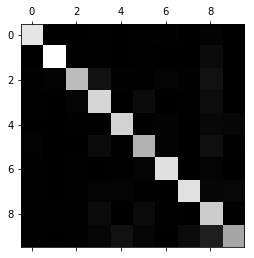

My class


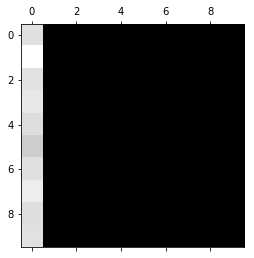

In [47]:
import matplotlib.pyplot as plt
print("Scikit class")
plt.matshow(all_M, cmap=plt.cm.gray)
plt.show()
print("My class")
plt.matshow(my_all_M, cmap=plt.cm.gray)
plt.show()

#### Qe Run a classifier on your data

Finally, try to run a classifier on the data-set you selected previously, perhaps starting with the SGD.

Is it possible to classify at all on your data, or do we need regression instead?

Are you able to do supervised learning, or are there no obvious `y_true` data in your set at all?

If your data is in the form, where you are able to do supervised-classification, could you produce a confusion matrix heatmap, then?

C:\Users\Tobias\Anaconda3\envs\ITMALNY\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\Tobias\Anaconda3\envs\ITMALNY\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


All the data M=[[0 ... 0]
                ...
                [0 ... 0]]


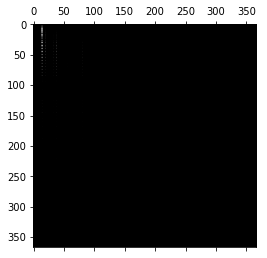

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import os
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from libitmal import utils as itmalutils


datapath = os.path.join("../datasets", "wine", "")

# Load the data
df = pd.read_csv(datapath + "wine-data.csv")
#Remove NaN
df = df.dropna(subset=["price", "points"])
wine_price = df["price"]
wine_points = df["points"]
y = np.c_[wine_price].ravel()
X = np.c_[wine_points]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=100000, shuffle=True)
sgd_clf = SGDClassifier(random_state=42, max_iter=500, tol=1e-3)
y_pred_train_all=cross_val_predict(sgd_clf, X_train, y_train, cv=3)
all_M=confusion_matrix(y_train, y_pred_train_all)
itmalutils.PrintMatrix(all_M, "All the data M=")
plt.matshow(all_M, cmap=plt.cm.gray)
plt.show()